Install tensorflow

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### Install Dependencies

In [2]:
from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt
import os

### Load Dataset

In [3]:
(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

### Reshape

In [6]:
Y_train = Y_train.reshape(-1, )
Y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
Y_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [8]:
len(Y_classes)

10

### Observe Dataset

In [9]:
def showImage(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(Y_classes[y[index]])

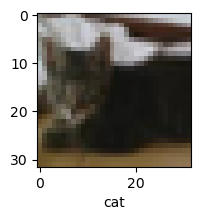

In [10]:
showImage(X_train, Y_train, 9)

### Normalize Dataset

In [11]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

### Build Model


In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(4,4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=34, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

C:\Users\Shubham Gupta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Model

In [15]:
model.compile(
    optimizer = "adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### Train Model

In [16]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=40)

Epoch 1/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.4573 - loss: 1.4939 - val_accuracy: 0.5608 - val_loss: 1.2198
Epoch 2/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5977 - loss: 1.1358 - val_accuracy: 0.5970 - val_loss: 1.1267
Epoch 3/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6471 - loss: 1.0031 - val_accuracy: 0.6516 - val_loss: 1.0074
Epoch 4/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6790 - loss: 0.9218 - val_accuracy: 0.6606 - val_loss: 0.9682
Epoch 5/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7017 - loss: 0.8604 - val_accuracy: 0.6847 - val_loss: 0.9343
Epoch 6/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7183 - loss: 0.8136 - val_accuracy: 0.6902 - val_loss: 0.9118
Epoch 7/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7339 - loss: 0.7656 - val_accuracy: 0.7068 - val_loss: 0.8666
Epoch 8/40
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7476 -

In [17]:
y_predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [18]:
y_predictions[9]

array([1.8119388e-09, 9.9999964e-01, 1.9362851e-09, 1.8560144e-10,
       1.9405444e-09, 5.1774967e-14, 1.2367951e-09, 2.8759849e-17,
       9.6172128e-09, 3.0885059e-07], dtype=float32)

In [19]:
y_predictions = [int(np.argmax(arr)) for arr in y_predictions]

In [20]:
y_predictions

[3,
 1,
 1,
 0,
 6,
 6,
 1,
 6,
 3,
 1,
 0,
 9,
 2,
 7,
 9,
 8,
 5,
 7,
 8,
 6,
 7,
 0,
 4,
 9,
 4,
 4,
 4,
 0,
 9,
 6,
 6,
 4,
 4,
 6,
 9,
 9,
 7,
 9,
 9,
 5,
 4,
 6,
 5,
 6,
 2,
 9,
 3,
 3,
 4,
 4,
 9,
 8,
 2,
 9,
 8,
 8,
 7,
 7,
 5,
 6,
 7,
 3,
 6,
 2,
 6,
 2,
 1,
 2,
 3,
 7,
 2,
 6,
 8,
 8,
 0,
 2,
 0,
 3,
 3,
 8,
 8,
 1,
 1,
 7,
 2,
 7,
 2,
 0,
 8,
 9,
 0,
 6,
 8,
 6,
 4,
 6,
 6,
 0,
 2,
 5,
 7,
 2,
 6,
 6,
 1,
 1,
 8,
 6,
 8,
 7,
 4,
 0,
 4,
 2,
 9,
 3,
 0,
 4,
 2,
 5,
 8,
 7,
 1,
 2,
 8,
 0,
 8,
 3,
 3,
 2,
 4,
 1,
 8,
 9,
 1,
 2,
 9,
 7,
 3,
 9,
 4,
 5,
 6,
 3,
 1,
 0,
 6,
 5,
 5,
 2,
 8,
 9,
 6,
 0,
 0,
 5,
 2,
 9,
 3,
 4,
 2,
 1,
 6,
 2,
 2,
 7,
 8,
 4,
 2,
 0,
 9,
 9,
 9,
 8,
 9,
 9,
 3,
 7,
 3,
 0,
 0,
 5,
 2,
 6,
 0,
 8,
 6,
 2,
 7,
 8,
 2,
 6,
 4,
 1,
 7,
 5,
 8,
 8,
 7,
 8,
 5,
 9,
 8,
 7,
 1,
 3,
 8,
 5,
 7,
 9,
 7,
 7,
 5,
 7,
 8,
 4,
 7,
 9,
 2,
 7,
 7,
 3,
 9,
 7,
 3,
 9,
 9,
 2,
 3,
 4,
 5,
 1,
 2,
 8,
 8,
 0,
 4,
 0,
 6,
 2,
 1,
 9,
 8,
 9,
 0,
 3,
 1,
 8,
 2,
 6,


In [21]:
y_tes = Y_test.reshape(-1, )

In [22]:
y_predictions[4]

6

TypeError: only integer scalar arrays can be converted to a scalar index

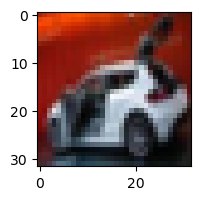

In [23]:
showImage(X_test,Y_test,6)

### Evaluate Model

In [24]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6985 - loss: 1.4979


[1.497873067855835, 0.6984999775886536]

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(Y_test, y_predictions))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1000
           1       0.83      0.81      0.82      1000
           2       0.56      0.60      0.58      1000
           3       0.56      0.45      0.50      1000
           4       0.61      0.72      0.66      1000
           5       0.63      0.56      0.59      1000
           6       0.75      0.79      0.77      1000
           7       0.74      0.75      0.74      1000
           8       0.84      0.78      0.81      1000
           9       0.75      0.83      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(Y_test, y_predictions)

In [29]:
cm

array([[699,  25,  84,  17,  34,  15,  11,  16,  55,  44],
       [ 16, 807,   7,   9,   2,   0,  10,   3,  24, 122],
       [ 56,   7, 597,  40, 120,  55,  65,  37,   9,  14],
       [ 34,  14, 100, 454,  98, 152,  64,  41,  17,  26],
       [ 14,   2,  54,  46, 722,  34,  46,  71,   8,   3],
       [ 12,   8,  86, 144,  68, 560,  36,  70,   6,  10],
       [  7,   8,  56,  42,  61,  16, 787,   6,   7,  10],
       [ 16,   6,  55,  31,  75,  46,  12, 748,   1,  10],
       [ 79,  36,  26,   9,   7,   8,  11,   5, 784,  35],
       [ 34,  64,   8,  15,   4,   6,   3,  20,  19, 827]])

In [30]:
import seaborn as sns


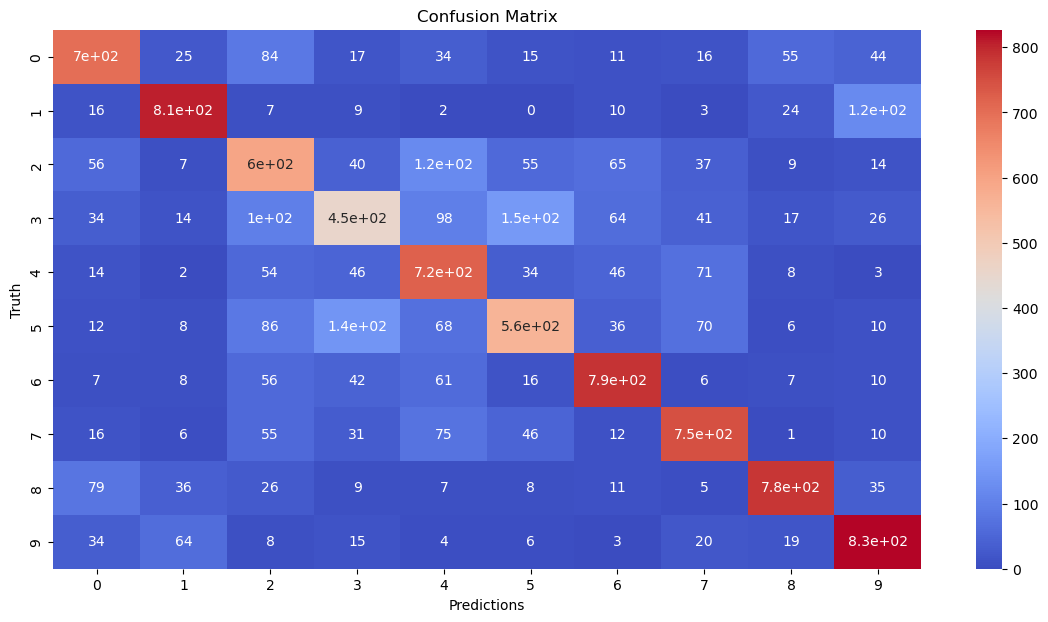

In [31]:
plt.figure(figsize=(14,7))
sns.heatmap(cm,annot=True,cmap="coolwarm")
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix")
plt.show()

### Export Model

In [32]:
model.save("cnn_cifar10_model.keras")
print("Model saved successfully as cnn_cifar10_model.keras")

Model saved successfully as cnn_cifar10_model.keras
